In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For handling categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For handling datetime if applicable
from datetime import datetime
%matplotlib inline
# Setting seaborn style for better aesthetics
sns.set(style='whitegrid', palette='muted', font_scale=1.2)




In [2]:
# Define the path to the development data
dev_data_path = '/home/harsh/Hackathons/Convolve/data/dev/Dev_data_to_be_shared.csv'  # Update this path as necessary

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(dev_data_path)
    print(f"Development data loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found at {dev_data_path}. Please check the path and try again.")


Development data loaded successfully with shape: (96806, 1216)


In [3]:
# Display first few rows
df.head()

# Summary statistics
df.describe().T

# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


Columns with Missing Values:
bureau_447           100.000000
bureau_436           100.000000
bureau_449            94.124331
bureau_148            93.552053
bureau_448            90.028511
                        ...    
bureau_230             1.232362
onus_attribute_13      0.002066
onus_attribute_10      0.002066
onus_attribute_5       0.002066
onus_attribute_16      0.002066
Length: 1185, dtype: float64


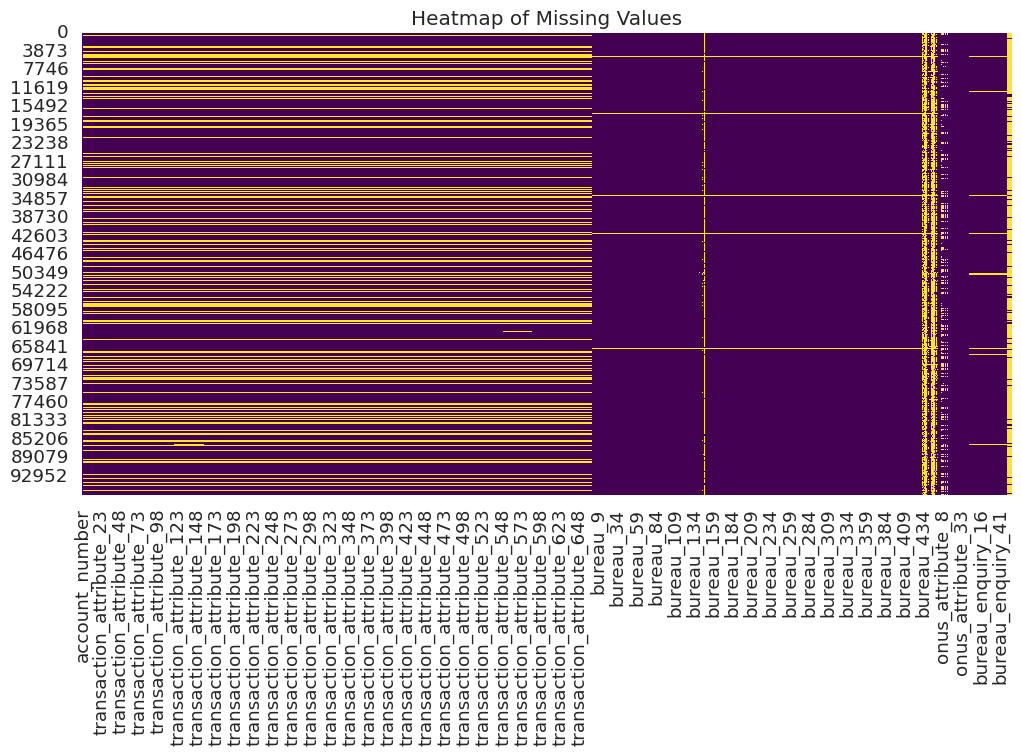

/home/harsh/Hackathons/Convolve/venv/lib/python3.12/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['bureau_436' 'bureau_447']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Columns must be same length as key

In [4]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().mean().sort_values(ascending=False) * 100
missing_values = missing_values[missing_values > 0]

print(f"Columns with Missing Values:\n{missing_values}")

# Visualizing missing values using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Handling missing values
# For numerical features: Impute with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('bad_flag')  # Exclude target variable

imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# For categorical features: Impute with the most frequent value
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Verify no missing values remain
print(f"Missing values after imputation:\n{df.isnull().sum().sum()}")


In [4]:
# Identify categorical columns (assuming object type)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target variable if present
if 'bad_flag' in categorical_cols:
    categorical_cols.remove('bad_flag')

# Option 1: Label Encoding for binary categorical variables
# Option 2: One-Hot Encoding for multi-category variables

# Example: Label Encoding for binary categories
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Example: One-Hot Encoding for multi-category variables
multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print(f"Data shape after encoding: {df.shape}")


NameError: name 'df' is not defined

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Feature scaling completed.")


NameError: name 'StandardScaler' is not defined

In [6]:
# Assuming 'onus_attributes_credit_limit' and 'onus_attributes_current_balance' exist
if 'onus_attributes_credit_limit' in df.columns and 'onus_attributes_current_balance' in df.columns:
    df['credit_utilization'] = df['onus_attributes_current_balance'] / df['onus_attributes_credit_limit']
    # Handle division by zero if any
    df['credit_utilization'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['credit_utilization'].fillna(0, inplace=True)
else:
    print("Required columns for credit utilization not found.")


NameError: name 'df' is not defined

In [7]:
# Assuming transaction_attribute_amount_* columns exist
transaction_amount_cols = [col for col in df.columns if 'transaction_attribute_amount_' in col]

if transaction_amount_cols:
    df['avg_transaction_value'] = df[transaction_amount_cols].mean(axis=1)
else:
    print("No transaction amount columns found.")


NameError: name 'df' is not defined

In [8]:
# Number of transactions across all merchants
transaction_freq_cols = [col for col in df.columns if 'transaction_attribute_count_' in col]

if transaction_freq_cols:
    df['total_transaction_count'] = df[transaction_freq_cols].sum(axis=1)
else:
    print("No transaction count columns found.")


NameError: name 'df' is not defined

In [9]:
# Assuming bureau_delinq_* columns exist
bureau_delinq_cols = [col for col in df.columns if 'bureau_delinq_' in col]

if bureau_delinq_cols:
    df['total_delinquencies'] = df[bureau_delinq_cols].sum(axis=1)
else:
    print("No bureau delinquency columns found.")


NameError: name 'df' is not defined

In [10]:
# Assuming bureau_enquiry_recent_* columns exist
bureau_enquiry_cols = [col for col in df.columns if 'bureau_enquiry_' in col]

if bureau_enquiry_cols:
    df['total_recent_enquiries'] = df[bureau_enquiry_cols].sum(axis=1)
else:
    print("No bureau enquiry columns found.")


NameError: name 'df' is not defined

In [11]:
# Assuming 'onus_attributes_credit_limit' and 'onus_attributes_income' exist
if 'onus_attributes_credit_limit' in df.columns and 'onus_attributes_income' in df.columns:
    df['credit_limit_income_ratio'] = df['onus_attributes_credit_limit'] / df['onus_attributes_income']
    df['credit_limit_income_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['credit_limit_income_ratio'].fillna(0, inplace=True)
else:
    print("Required columns for credit limit to income ratio not found.")


NameError: name 'df' is not defined

In [12]:
# Create a score based on recent transactions and enquiries
# Example: weighted sum of recent transactions and enquiries
df['recent_activity_score'] = (df.get('total_transaction_count', 0) * 0.6) + (df.get('total_recent_enquiries', 0) * 0.4)


NameError: name 'df' is not defined

In [13]:
# Assuming 'account_open_date' exists in the dataset
if 'account_open_date' in df.columns:
    df['account_open_date'] = pd.to_datetime(df['account_open_date'], errors='coerce')
    current_date = pd.to_datetime('today')
    df['account_age_days'] = (current_date - df['account_open_date']).dt.days
    # Handle missing or future dates
    df['account_age_days'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['account_age_days'].fillna(df['account_age_days'].median(), inplace=True)
else:
    print("Account open date column not found.")



NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select a subset of numerical features for polynomial interactions
selected_features = ['credit_utilization', 'avg_transaction_value', 'total_transaction_count',
                     'total_delinquencies', 'total_recent_enquiries', 'credit_limit_income_ratio',
                     'recent_activity_score', 'account_age_days']

# Ensure all selected features are in the dataframe
selected_features = [feat for feat in selected_features if feat in df.columns]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features = poly.fit_transform(df[selected_features])

# Create DataFrame for polynomial features
poly_feature_names = poly.get_feature_names(selected_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

# Merge polynomial features back to the main dataframe
df = pd.concat([df, df_poly], axis=1)

print(f"Data shape after polynomial feature engineering: {df.shape}")


ModuleNotFoundError: No module named 'sklearn'

In [15]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.drop(['bad_flag'], axis=1))

# Get columns to keep
columns_to_keep = df.drop(['bad_flag'], axis=1).columns[selector.get_support()]

# Filter the dataframe
df = df[columns_to_keep.tolist() + ['bad_flag']]

print(f"Data shape after variance thresholding: {df.shape}")


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Ensure all features are numerical and there are no missing values
print("Final feature set:")
print(df.info())

# Separate features and target
X = df.drop(['bad_flag'], axis=1)
y = df['bad_flag']

# Save the processed data for further modeling
processed_data_path = 'data/processed/dev_data_processed.csv'
df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")
